## 1. Histogram Equalization

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [2]:
d1_images = [cv2.imread(file) for file in glob.glob('C:/Users/praneeth/Desktop/MSRA-TD500/test/*.jpg')]
d2_images = [cv2.imread(file) for file in glob.glob('C:/Users/praneeth/Desktop/LFW/*.jpg')]

In [20]:
def histogramDisplay(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    eq = cv2.equalizeHist(img)
    plt.show(img)

### 1.1 Dataset 1 Images Results

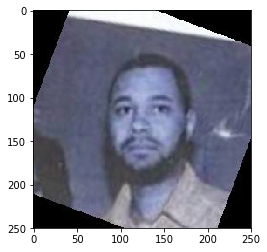

In [27]:
plt.imshow(d1_images[2])

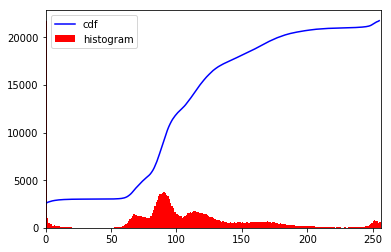

In [28]:
try:
    histogramDisplay(d1_images[2])
except ValueError:
    pass

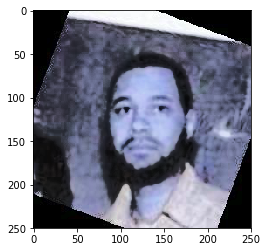

In [29]:
img_hsv = cv2.cvtColor(d1_images[2], cv2.COLOR_RGB2HSV)
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
image = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image)

### 2.3 Laplacian Filter

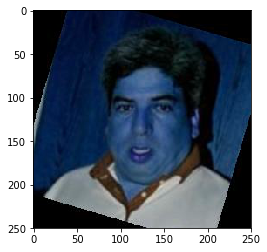

In [16]:
plt.imshow(d2_images[3])

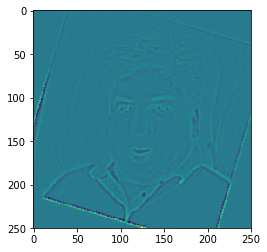

In [17]:
ddepth = cv2.CV_16S
kernel_size = 3
src = cv2.GaussianBlur(d2_images[3], (3, 3), 0)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
plt.imshow(dst)

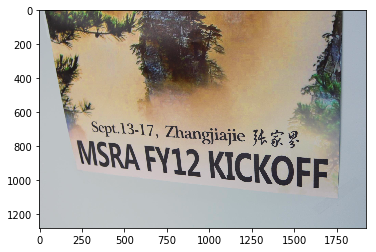

In [21]:
plt.imshow(d1_images[0])

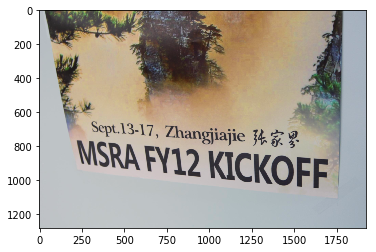

In [20]:
blur = cv2.GaussianBlur(d1_images[0],(5,5),0)
plt.imshow(blur)

In [22]:
def mean_filter(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    figure_size = 9 # the dimension of the x and y axis of the kernal.
    new_image = cv2.blur(image,(figure_size, figure_size))
    plt.figure(figsize=(11,6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
    plt.xticks([]), plt.yticks([])
    plt.show()

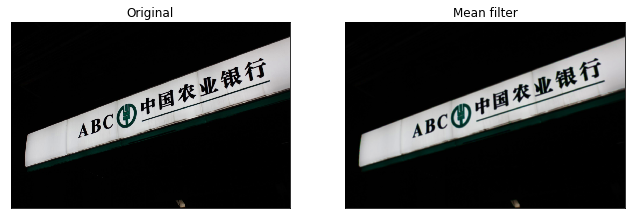

In [24]:
mean_filter(d1_images[1])